# Emergency - 911 Calls
 Montgomery County, PA


### Columns
<lo>
<li><b>lat</b>-Latitude
<li><b>lng</b>-Longitude
<li><b>desc</b>-Description of Emergency
<li><b>zip</b>-ZIP Code
<li><b>title</b>-Title of Emergency
<li><b>timeStamp</b>-Date and time of the call
<li><b>twp</b>-Town
<li><b>addr</b>-Adress
    </lo>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
def barChartView (x,y):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=y, data=x)

In [3]:
data = pd.read_csv("911.csv")

In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [6]:
data['Reason'] = data.title.apply(lambda title: title.split(': ')[0])

In [7]:
data.Reason.value_counts()


EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

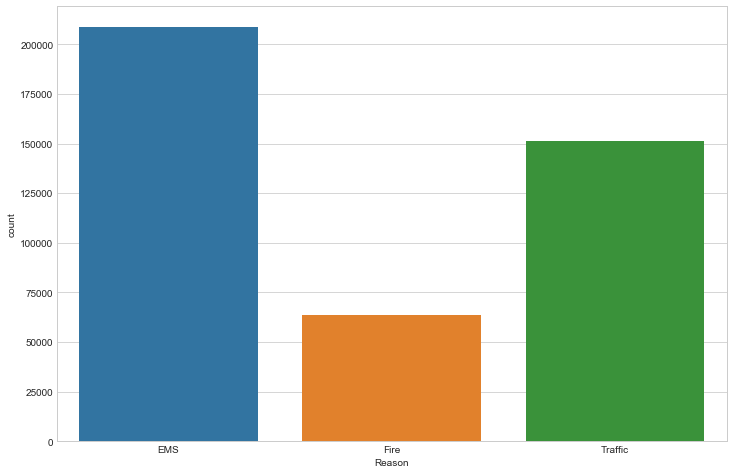

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data.Reason, data=data)

In [9]:
data['timeStamp'] = pd.to_datetime(data.timeStamp)

In [10]:
time = data['timeStamp'].iloc[0]
time.hour

17

In [11]:
data['Year'] = data.timeStamp.dt.year
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,2015
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,2015
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,2015
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015


In [12]:
data1 = data[data.Year == 2018]

In [13]:
data1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year
290619,40.121736,-75.359385,HAMILTON ST & W MAIN ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2018-01-01 00:08:58,NORRISTOWN,HAMILTON ST & W MAIN ST,1,EMS,2018
290620,40.258253,-75.248230,BETHLEHEM PIKE & TAYLOR RD; MONTGOMERY; Stati...,19446.0,EMS: RESPIRATORY EMERGENCY,2018-01-01 00:16:00,MONTGOMERY,BETHLEHEM PIKE & TAYLOR RD,1,EMS,2018
290621,40.090097,-75.126584,YORK RD & OLD YORK RD; JENKINTOWN; 2018-01-01 ...,19046.0,Fire: UNKNOWN TYPE FIRE,2018-01-01 00:14:57,JENKINTOWN,YORK RD & OLD YORK RD,1,Fire,2018
290622,40.143086,-75.060593,HUNTINGDON PIKE & CARRIAGE LN; LOWER MORELAND...,19006.0,EMS: DEHYDRATION,2018-01-01 00:16:55,LOWER MORELAND,HUNTINGDON PIKE & CARRIAGE LN,1,EMS,2018
290623,40.095171,-75.414699,1ST AVE & FREEDOM DR; UPPER MERION; Station 3...,19406.0,EMS: FALL VICTIM,2018-01-01 00:19:25,UPPER MERION,1ST AVE & FREEDOM DR,1,EMS,2018


In [14]:
data1.shape

(133290, 11)

In [15]:
data1.Reason.value_counts()


EMS        63598
Traffic    49142
Fire       20550
Name: Reason, dtype: int64

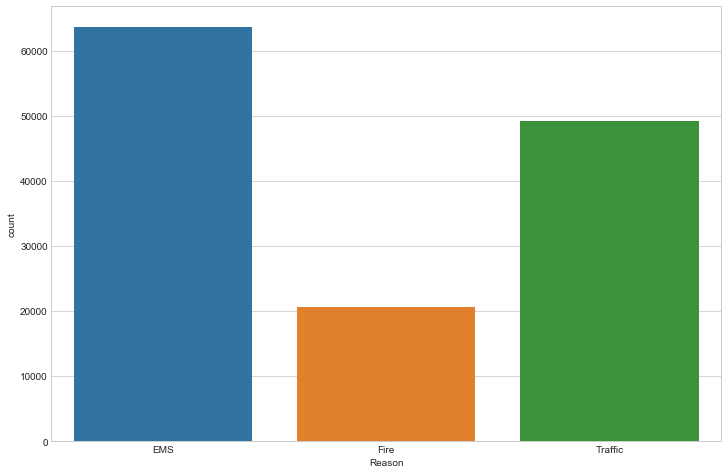

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data1.Reason, data=data1)

In [17]:
data1['Hour'] = data1.timeStamp.dt.hour
data1['Month'] = data1.timeStamp.dt.month
data1['DayOfWeek'] = data1.timeStamp.dt.weekday

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [18]:
data1.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Month,DayOfWeek
290619,40.121736,-75.359385,HAMILTON ST & W MAIN ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2018-01-01 00:08:58,NORRISTOWN,HAMILTON ST & W MAIN ST,1,EMS,2018,0,1,0
290620,40.258253,-75.248230,BETHLEHEM PIKE & TAYLOR RD; MONTGOMERY; Stati...,19446.0,EMS: RESPIRATORY EMERGENCY,2018-01-01 00:16:00,MONTGOMERY,BETHLEHEM PIKE & TAYLOR RD,1,EMS,2018,0,1,0
290621,40.090097,-75.126584,YORK RD & OLD YORK RD; JENKINTOWN; 2018-01-01 ...,19046.0,Fire: UNKNOWN TYPE FIRE,2018-01-01 00:14:57,JENKINTOWN,YORK RD & OLD YORK RD,1,Fire,2018,0,1,0
290622,40.143086,-75.060593,HUNTINGDON PIKE & CARRIAGE LN; LOWER MORELAND...,19006.0,EMS: DEHYDRATION,2018-01-01 00:16:55,LOWER MORELAND,HUNTINGDON PIKE & CARRIAGE LN,1,EMS,2018,0,1,0
290623,40.095171,-75.414699,1ST AVE & FREEDOM DR; UPPER MERION; Station 3...,19406.0,EMS: FALL VICTIM,2018-01-01 00:19:25,UPPER MERION,1ST AVE & FREEDOM DR,1,EMS,2018,0,1,0
290624,40.235811,-75.624866,INDUSTRIAL HWY & MOSER RD; LOWER POTTSGROVE; ...,19464.0,EMS: SEIZURES,2018-01-01 00:21:55,LOWER POTTSGROVE,INDUSTRIAL HWY & MOSER RD,1,EMS,2018,0,1,0
290625,40.017858,-75.239751,CORNELL RD & CONSHOHOCKEN STATE RD; LOWER MER...,19004.0,EMS: SYNCOPAL EPISODE,2018-01-01 00:28:07,LOWER MERION,CORNELL RD & CONSHOHOCKEN STATE RD,1,EMS,2018,0,1,0
290626,40.175304,-75.128158,EASTON RD & PINE AVE; HORSHAM; Station 352; 2...,19044.0,EMS: UNKNOWN MEDICAL EMERGENCY,2018-01-01 00:33:04,HORSHAM,EASTON RD & PINE AVE,1,EMS,2018,0,1,0
290627,40.233713,-75.463603,HIGHLAND MANOR DR & DEAD END; PERKIOMEN; Stat...,NaN,EMS: ABDOMINAL PAINS,2018-01-01 00:40:02,PERKIOMEN,HIGHLAND MANOR DR & DEAD END,1,EMS,2018,0,1,0
290628,40.158982,-75.196654,SUSQUEHANNA RD & SPARK DR; UPPER DUBLIN; Stat...,19002.0,EMS: FALL VICTIM,2018-01-01 00:40:33,UPPER DUBLIN,SUSQUEHANNA RD & SPARK DR,1,EMS,2018,0,1,0


In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data1['DayOfWeek'] = data1.DayOfWeek.map(dmap)
data1.DayOfWeek.head(10)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


290619    Mon
290620    Mon
290621    Mon
290622    Mon
290623    Mon
290624    Mon
290625    Mon
290626    Mon
290627    Mon
290628    Mon
Name: DayOfWeek, dtype: object

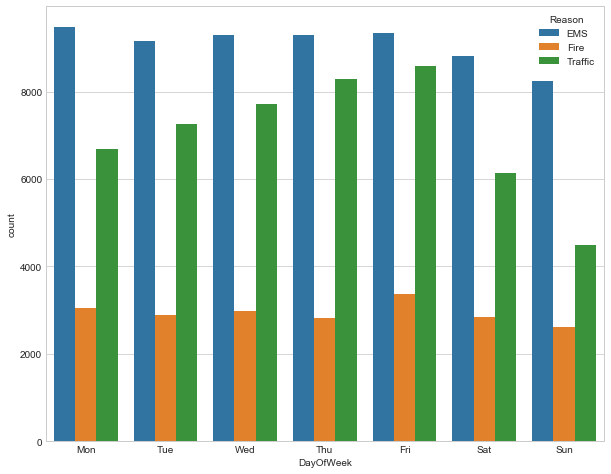

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data1.DayOfWeek, data=data1, hue='Reason')

In [21]:
xx = data1.Month

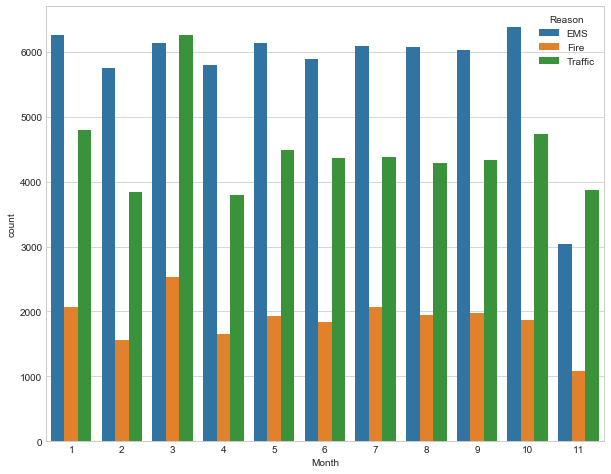

In [22]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data1.Month, data=data1, hue='Reason')

In [23]:
byMonth = data1.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,DayOfWeek
Month,,,,,,,,,,,,,
1,13123,13123,13123,11603,13123,13123,13120,13123,13123,13123,13123,13123,13123
2,11165,11165,11165,9802,11165,11165,11159,11165,11165,11165,11165,11165,11165
3,14923,14923,14923,13256,14923,14923,14919,14923,14923,14923,14923,14923,14923
4,11240,11240,11240,9817,11240,11240,11239,11240,11240,11240,11240,11240,11240
5,12551,12551,12551,10860,12551,12551,12546,12551,12551,12551,12551,12551,12551
6,12106,12106,12106,10431,12106,12106,12094,12106,12106,12106,12106,12106,12106
7,12549,12549,12549,10923,12549,12549,12541,12549,12549,12549,12549,12549,12549
8,12315,12315,12315,10773,12315,12315,12311,12315,12315,12315,12315,12315,12315
9,12338,12338,12338,10758,12338,12338,12332,12338,12338,12338,12338,12338,12338


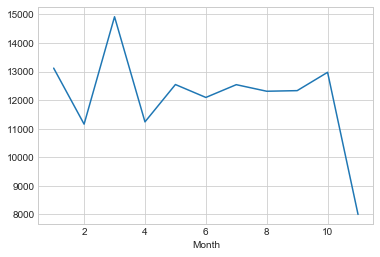

In [24]:
byMonth.twp.plot()


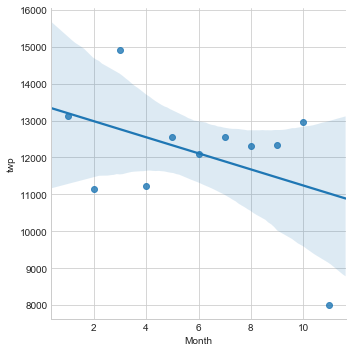

In [25]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())


In [26]:
data1['Date'] = data1.timeStamp.dt.date
data1.Date.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


290619    2018-01-01
290620    2018-01-01
290621    2018-01-01
290622    2018-01-01
290623    2018-01-01
Name: Date, dtype: object

In [27]:
byDate = data1.groupby("Date").count()
byDate.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Month,DayOfWeek
Date,,,,,,,,,,,,,,
2018-01-01,395,395,395,343,395,395,395,395,395,395,395,395,395,395
2018-01-02,493,493,493,431,493,493,493,493,493,493,493,493,493,493
2018-01-03,557,557,557,513,557,557,557,557,557,557,557,557,557,557
2018-01-04,595,595,595,514,595,595,595,595,595,595,595,595,595,595
2018-01-05,612,612,612,532,612,612,612,612,612,612,612,612,612,612
2018-01-06,481,481,481,418,481,481,480,481,481,481,481,481,481,481
2018-01-07,420,420,420,380,420,420,420,420,420,420,420,420,420,420
2018-01-08,479,479,479,430,479,479,479,479,479,479,479,479,479,479
2018-01-09,491,491,491,444,491,491,491,491,491,491,491,491,491,491


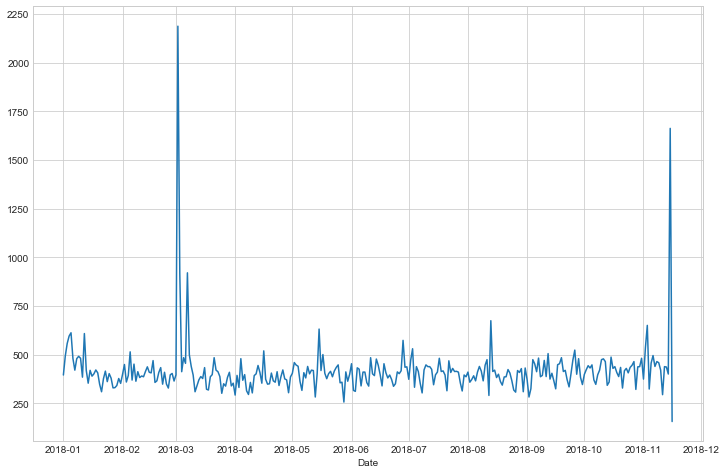

In [28]:
plt.figure(figsize=(12, 8))
byDate.twp.plot()

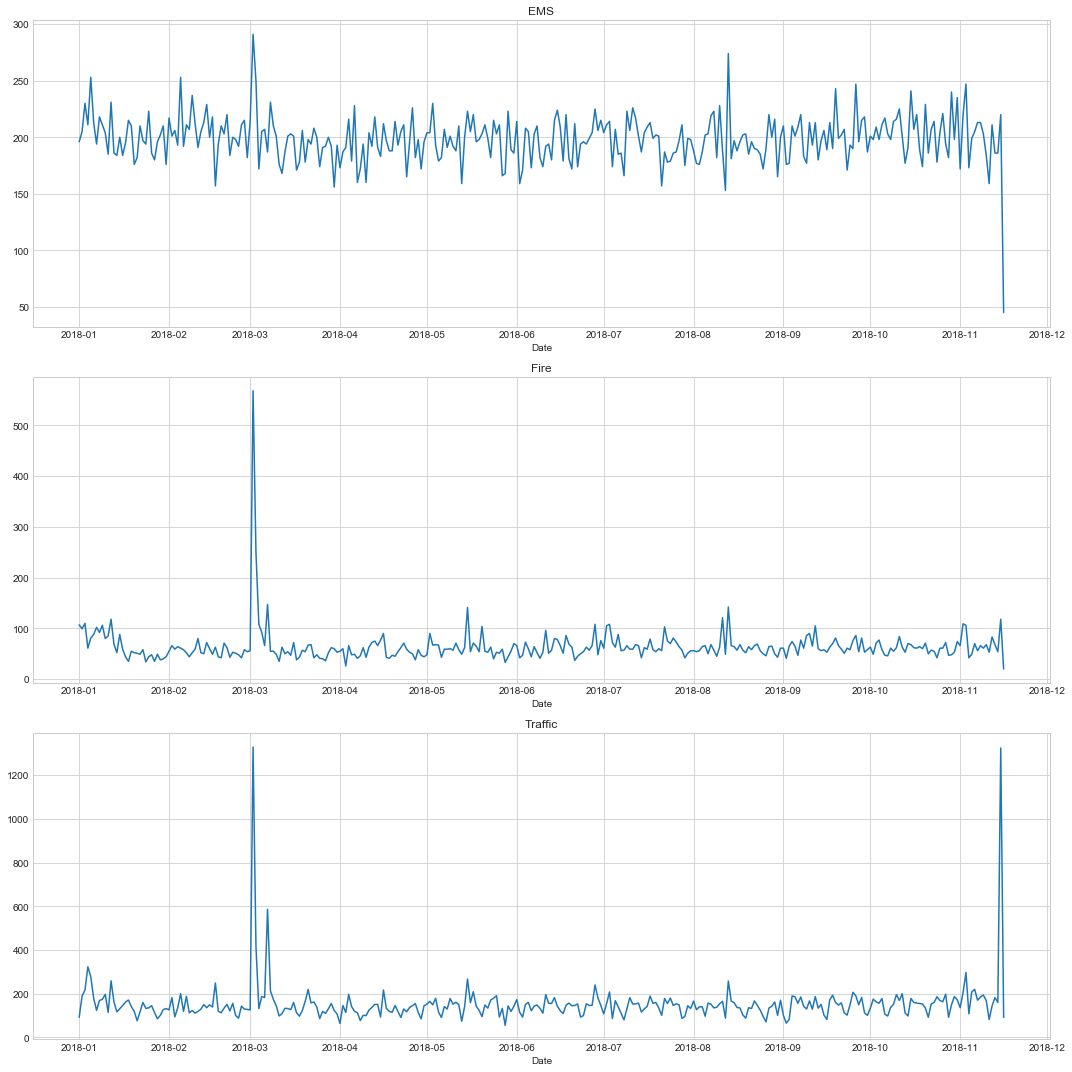

In [29]:
plt.figure(figsize=(15, 15))

for i, reason in enumerate(data1.Reason.unique(), 1):
    plt.subplot(3, 1, i)
    data1[data1['Reason']==reason].groupby('Date').count()['twp'].plot()
    plt.title(reason)
    plt.tight_layout()

In [30]:
data2 = data1[data1.Month == 3]
data2.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Month,DayOfWeek,Date
314907,40.251233,-75.661982,BEECH ST & GABLE AVE; POTTSTOWN; Station 329;...,19464.0,EMS: CARDIAC EMERGENCY,2018-03-01 00:00:46,POTTSTOWN,BEECH ST & GABLE AVE,1,EMS,2018,0,3,Thu,2018-03-01
314908,40.221227,-75.288737,DEKALB PIKE & RT202 PKWY; UPPER GWYNEDD; Stat...,NaN,EMS: CARDIAC EMERGENCY,2018-03-01 00:01:29,UPPER GWYNEDD,DEKALB PIKE & RT202 PKWY,1,EMS,2018,0,3,Thu,2018-03-01
314909,40.078593,-75.314305,OLD ELM ST & LIGHT ST; PLYMOUTH; Station 308A...,19428.0,EMS: HEMORRHAGING,2018-03-01 00:05:11,PLYMOUTH,OLD ELM ST & LIGHT ST,1,EMS,2018,0,3,Thu,2018-03-01
314910,40.083761,-75.142205,WASHINGTON LN & W CHURCH RD; CHELTENHAM; Stat...,19095.0,EMS: RESPIRATORY EMERGENCY,2018-03-01 00:25:13,CHELTENHAM,WASHINGTON LN & W CHURCH RD,1,EMS,2018,0,3,Thu,2018-03-01
314911,40.107400,-75.113206,THE FAIRWAY & RYDAL RD; ABINGTON; Station 38...,19046.0,EMS: GENERAL WEAKNESS,2018-03-01 00:22:22,ABINGTON,THE FAIRWAY & RYDAL RD,1,EMS,2018,0,3,Thu,2018-03-01
314912,40.114915,-75.305193,N GRAVERS RD & JOHNSON RD; PLYMOUTH; 2018-03-0...,19462.0,Traffic: DISABLED VEHICLE -,2018-03-01 00:23:10,PLYMOUTH,N GRAVERS RD & JOHNSON RD,1,Traffic,2018,0,3,Thu,2018-03-01
314913,40.168538,-75.498200,BLACK ROCK RD & S TRAPPE RD; UPPER PROVIDENCE...,19468.0,EMS: FALL VICTIM,2018-03-01 00:28:31,UPPER PROVIDENCE,BLACK ROCK RD & S TRAPPE RD,1,EMS,2018,0,3,Thu,2018-03-01
314914,40.155060,-75.102251,DAVISVILLE RD & PENNYPACK RD; UPPER MORELAND;...,19040.0,EMS: UNCONSCIOUS SUBJECT,2018-03-01 00:26:35,UPPER MORELAND,DAVISVILLE RD & PENNYPACK RD,1,EMS,2018,0,3,Thu,2018-03-01
314915,40.108267,-75.306233,BLUEROUTE & BROOK RD UNDERPASS; PLYMOUTH; 201...,NaN,Traffic: DISABLED VEHICLE -,2018-03-01 00:26:10,PLYMOUTH,BLUEROUTE & BROOK RD UNDERPASS,1,Traffic,2018,0,3,Thu,2018-03-01
314916,40.119318,-75.352269,KOHN ST & W AIRY ST; NORRISTOWN; Station 308A...,19401.0,EMS: RESPIRATORY EMERGENCY,2018-03-01 00:34:20,NORRISTOWN,KOHN ST & W AIRY ST,1,EMS,2018,0,3,Thu,2018-03-01


In [31]:
data2.Reason.value_counts()

Traffic    6256
EMS        6138
Fire       2529
Name: Reason, dtype: int64

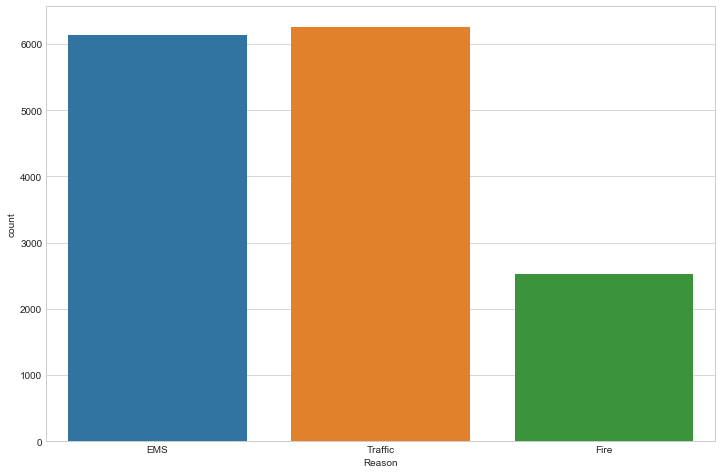

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data2.Reason, data=data2)

In [33]:
data2['Hour'] = data2.timeStamp.dt.hour
data2['Month'] = data2.timeStamp.dt.month
data2['DayOfWeek'] = data2.timeStamp.dt.weekday

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [34]:
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data2['DayOfWeek'] = data2.DayOfWeek.map(dmap1)
data2.DayOfWeek.head(10)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


314907    Thu
314908    Thu
314909    Thu
314910    Thu
314911    Thu
314912    Thu
314913    Thu
314914    Thu
314915    Thu
314916    Thu
Name: DayOfWeek, dtype: object

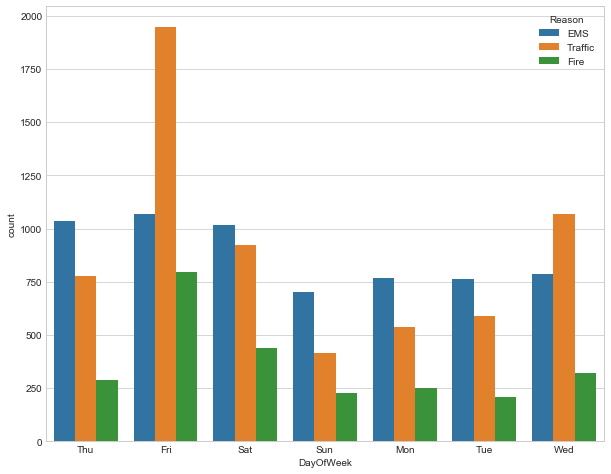

In [35]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data2.DayOfWeek, data=data2, hue='Reason')

In [36]:
data3 = data2[(data2.DayOfWeek == "Fri")]
data3.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Month,DayOfWeek,Date
315303,40.133037,-75.408463,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: FALL VICTIM,2018-03-02 00:15:01,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1,EMS,2018,0,3,Fri,2018-03-02
315304,40.187728,-75.432977,NANCY LN & REBECCA DR; LOWER PROVIDENCE; Stat...,19426.0,EMS: CARDIAC ARREST,2018-03-02 00:17:11,LOWER PROVIDENCE,NANCY LN & REBECCA DR,1,EMS,2018,0,3,Fri,2018-03-02
315305,40.119255,-75.236238,PENNSYLVANIA TPKE & JOSHUA RD OVERPASS; WHITEM...,NaN,Traffic: VEHICLE ACCIDENT -,2018-03-02 00:20:04,WHITEMARSH,PENNSYLVANIA TPKE & JOSHUA RD OVERPASS,1,Traffic,2018,0,3,Fri,2018-03-02
315306,40.006301,-75.294010,SCHOOL LN & SHELDON LN; LOWER MERION; Station...,19003.0,EMS: CARDIAC ARREST,2018-03-02 00:41:36,LOWER MERION,SCHOOL LN & SHELDON LN,1,EMS,2018,0,3,Fri,2018-03-02
315307,40.087176,-75.376192,KINGWOOD RD & FLINTLOCK RD; UPPER MERION; Sta...,19406.0,EMS: ABDOMINAL PAINS,2018-03-02 00:50:06,UPPER MERION,KINGWOOD RD & FLINTLOCK RD,1,EMS,2018,0,3,Fri,2018-03-02
315308,40.249026,-75.229891,STONE RIDGE DR & ABBEY LN; MONTGOMERY; Statio...,19446.0,EMS: FALL VICTIM,2018-03-02 01:00:25,MONTGOMERY,STONE RIDGE DR & ABBEY LN,1,EMS,2018,1,3,Fri,2018-03-02
315309,40.259094,-75.312900,WELSH RD & VERNON CT; HATFIELD TOWNSHIP; 2018-...,19446.0,Fire: FIRE ALARM,2018-03-02 00:58:57,HATFIELD TOWNSHIP,WELSH RD & VERNON CT,1,Fire,2018,0,3,Fri,2018-03-02
315310,40.177272,-75.106196,E MORELAND AVE & N YORK RD; HATBORO; 2018-03-0...,19040.0,Traffic: DISABLED VEHICLE -,2018-03-02 00:59:30,HATBORO,E MORELAND AVE & N YORK RD,1,Traffic,2018,0,3,Fri,2018-03-02
315311,40.177272,-75.106196,MORELAND AVE & S YORK RD; HATBORO; Station 38...,19040.0,EMS: RESPIRATORY EMERGENCY,2018-03-02 01:13:39,HATBORO,MORELAND AVE & S YORK RD,1,EMS,2018,1,3,Fri,2018-03-02
315312,40.137047,-75.317159,DEKALB PIKE & COLONIAL DR; EAST NORRITON; Sta...,19401.0,EMS: SUBJECT IN PAIN,2018-03-02 01:20:05,EAST NORRITON,DEKALB PIKE & COLONIAL DR,1,EMS,2018,1,3,Fri,2018-03-02


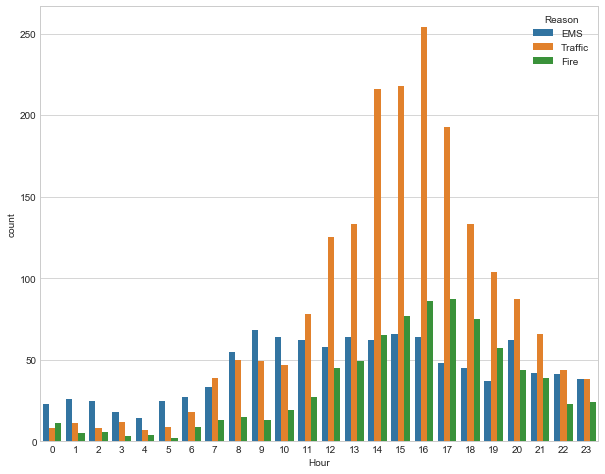

In [37]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data3.Hour, data=data3, hue='Reason')

In [38]:
data4 = data3[(data3.Hour >= 11) & (data3.Hour <= 21)]
data4.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Hour,Month,DayOfWeek,Date
315482,40.229008,-75.387853,S HANOVER ST & E HOFFECKER RD; CHESTER COUNTY;...,NaN,Traffic: ROAD OBSTRUCTION -,2018-03-02 11:00:31,CHESTER COUNTY,S HANOVER ST & E HOFFECKER RD,1,Traffic,2018,11,3,Fri,2018-03-02
315492,40.116176,-75.339577,GREEN ST & E MARSHALL ST; NORRISTOWN; Station...,19401.0,EMS: CARDIAC ARREST,2018-03-02 11:05:01,NORRISTOWN,GREEN ST & E MARSHALL ST,1,EMS,2018,11,3,Fri,2018-03-02
315493,40.191561,-75.230362,BETHLEHEM PIKE & MOORE DR; LOWER GWYNEDD; Sta...,19002.0,EMS: FALL VICTIM,2018-03-02 11:00:59,LOWER GWYNEDD,BETHLEHEM PIKE & MOORE DR,1,EMS,2018,11,3,Fri,2018-03-02
315494,40.221036,-75.289299,CHURCH RD & KNEEDLER RD; UPPER GWYNEDD; 2018-0...,19454.0,Fire: FIRE INVESTIGATION,2018-03-02 11:04:24,UPPER GWYNEDD,CHURCH RD & KNEEDLER RD,1,Fire,2018,11,3,Fri,2018-03-02
315495,40.120942,-75.068772,WALTON RD & WELSH RD; LOWER MORELAND; 2018-03-...,19006.0,Traffic: ROAD OBSTRUCTION -,2018-03-02 11:03:07,LOWER MORELAND,WALTON RD & WELSH RD,1,Traffic,2018,11,3,Fri,2018-03-02
315496,40.242191,-75.284775,MAIN ST & WALNUT ST; LANSDALE; 2018-03-02 @ 11...,19446.0,Fire: FIRE ALARM,2018-03-02 11:10:01,LANSDALE,MAIN ST & WALNUT ST,1,Fire,2018,11,3,Fri,2018-03-02
315497,40.072909,-75.315632,FRONT ST & BALLIGOMINGO RD; WEST CONSHOHOCKEN;...,19428.0,Fire: FIRE INVESTIGATION,2018-03-02 11:07:34,WEST CONSHOHOCKEN,FRONT ST & BALLIGOMINGO RD,1,Fire,2018,11,3,Fri,2018-03-02
315498,40.081195,-75.133262,CHELTEN HILLS DR & W CHURCH RD; CHELTENHAM; 20...,19027.0,Traffic: ROAD OBSTRUCTION -,2018-03-02 11:14:47,CHELTENHAM,CHELTEN HILLS DR & W CHURCH RD,1,Traffic,2018,11,3,Fri,2018-03-02
315499,40.021913,-75.312680,MONTGOMERY AVE & RADNOR ST; LOWER MERION; 2018...,19010.0,Traffic: ROAD OBSTRUCTION -,2018-03-02 11:13:04,LOWER MERION,MONTGOMERY AVE & RADNOR ST,1,Traffic,2018,11,3,Fri,2018-03-02
315500,40.007676,-75.295211,ARDMORE AVE & SCHOOL LN; LOWER MERION; Statio...,19003.0,EMS: SEIZURES,2018-03-02 11:17:09,LOWER MERION,ARDMORE AVE & SCHOOL LN,1,EMS,2018,11,3,Fri,2018-03-02


In [39]:
data4.Reason.value_counts()

Traffic    1607
Fire        651
EMS         610
Name: Reason, dtype: int64

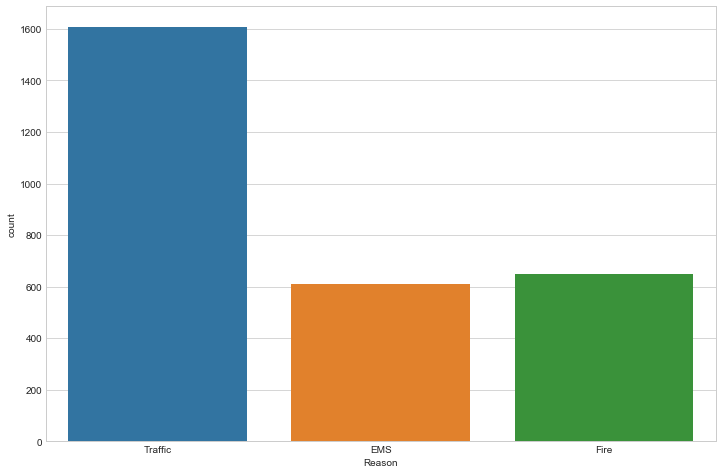

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data4.Reason, data=data4)

In [41]:
data3.addr.value_counts().head(10)

SHANNONDELL DR & SHANNONDELL BLVD         28
MORELAND RD & EASTON RD                   10
BLUEROUTE  & BALLIGOMINGO RD UNDERPASS     8
DAVISVILLE RD & PENNYPACK RD               8
BROAD ST & E 6TH ST                        8
EAGLEVILLE RD & SUNDERLAND DR              8
NO LOCATION - NEIGHBORING COUNTY           8
NORRISTOWN RD & RADCLIFF LN                7
BETHLEHEM PIKE                             7
BETHLEHEM PIKE & TAYLOR RD                 7
Name: addr, dtype: int64

In [42]:
data.addr.value_counts().head(10)

SHANNONDELL DR & SHANNONDELL BLVD                 4328
MAIN ST & OLD SUMNEYTOWN PIKE                     1595
THE FAIRWAY  & RYDAL RD                           1288
EVERGREEN RD & W LIGHTCAP RD                      1020
EAGLEVILLE RD & SUNDERLAND DR                     1006
SCHUYLKILL EXPY & WEADLEY RD OVERPASS              953
GULPH RD & KIRK AVE                                946
BLACK ROCK RD & S TRAPPE RD                        932
DAVISVILLE RD & PENNYPACK RD                       883
SCHUYLKILL EXPY & CONSHOHOCKEN STATE UNDERPASS     870
Name: addr, dtype: int64

<b>Now we see what are the best emergency calls, so the third month was Friday from 11 to 21 and the address (SHANNONDELL DR & SHANNONDELL BLVD) in general or the third month was the highest.</b>